Load data

In [1]:
import pandas as pd
import string
import regex as re
import seaborn as sns

In [2]:
books = pd.read_csv('dataset/book_recommender.csv')
books.head()

,title,author,google_id,recommender,recommender_count,category,publication_date,pages,image,url_image,Unnamed: 4,target_class
0,"Surely You're Joking, Mr. Feynman!",Richard P. Feynman,_gA_DwAAQBAJ,Brian Armstrong|Ev Williams|Larry Page|Mark Zu...,8,Biography & Autobiography,2018,352.0,NaN,NaN,NaN,general
1,What Do You Care What Other People Think?,Richard P. Feynman,vbMIlkpQXEkC,Larry Page|Naval Ravikant,2,Biography & Autobiography,2011,256.0,NaN,NaN,NaN,general
2,10% Happier,Dan Harris,pINcvgEACAAJ,Peter Attia|Veronica Belmont,2,Buddhism,2017,256.0,NaN,NaN,NaN,general
3,100 Best-Loved Poems,Philip Smith,YzRKPwAACAAJ,Naval Ravikant,1,Poetry,1995,96.0,NaN,NaN,NaN,general
4,100 Great Operas And Their Stories,Henry W. Simon,KEfSAOggWXwC,Eric Weinstein,1,Music,2010,560.0,NaN,NaN,NaN,general


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8702 non-null   object 
 1   author             3003 non-null   object 
 2   google_id          8608 non-null   object 
 3   recommender        3003 non-null   object 
 4   recommender_count  8702 non-null   int64  
 5   category           8457 non-null   object 
 6   publication_date   2898 non-null   object 
 7   pages              2814 non-null   float64
 8   image              5699 non-null   object 
 9   url_image          5699 non-null   object 
 10  Unnamed: 4         5303 non-null   object 
 11  target_class       8702 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 815.9+ KB


Exploration

In [4]:
books = books[~books.duplicated(subset=['title'])]
books['category'] = books['category'].fillna('no_category')
books['title'] = books['title'].fillna('no_title')
books['recommender_count'] = books['recommender_count'].fillna(0)
books = books[['title', 'category', 'recommender_count', 'target_class']]

Data Preprocessing

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def casefolding(text):
    return text.casefold()
def removeCharNumber(text):
    for i in string.punctuation:
        text = text.replace('{}'.format(i), '')
    if text.isnumeric():
        return text
    else:
        return ''.join(i for i in text if not i.isdigit())
def word_token(text:str):
    stopWords = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    arrays = [w for w in word_tokens if w not in stopWords]
    return arrays
def lemmatizing(word):
    wnl = WordNetLemmatizer()
    return ' '.join([wnl.lemmatize(words) for words in word])

def splitter(text):
    return text.split()


In [7]:
containers = []
for title in books['title']:
    title = casefolding(title)
    title = removeCharNumber(title)
    title = word_token(title)
    title = lemmatizing(title)
    title = splitter(title)
    containers.append(title)
books['title_preprocessing'] = containers
books['text_cleaning'] = books['title_preprocessing'].apply(lambda x: ' '.join(x))

In [8]:
books.target_class.unique()

array(['general', 'social-humanaria', 'sains-tech'], dtype=object)

In [9]:
books = books[books['text_cleaning'] != '']
books = books[['title','text_cleaning', 'category', 'target_class']]
books

,title,text_cleaning,category,target_class
0,"Surely You're Joking, Mr. Feynman!",surely youre joking mr feynman,Biography & Autobiography,general
1,What Do You Care What Other People Think?,care people think,Biography & Autobiography,general
2,10% Happier,happier,Buddhism,general
3,100 Best-Loved Poems,bestloved poem,Poetry,general
4,100 Great Operas And Their Stories,great opera story,Music,general
...,...,...,...,...
8697,Scandalous Behavior (A Stone Barrington Novel),scandalous behavior stone barrington novel,"Mystery, Thriller & Suspense",general
8698,Age of Distraction: The Island,age distraction island,"Mystery, Thriller & Suspense",sains-tech
8699,The Ghostly Quilts on Main (Colebridge Communi...,ghostly quilt main colebridge community,"Mystery, Thriller & Suspense",general
8700,Saving Jason (A Jason Stafford Novel),saving jason jason stafford novel,"Mystery, Thriller & Suspense",general


In [10]:
books.to_csv('dataset/preprocessing.csv', sep=';', encoding='utf-8', index=False)

In [11]:
df = pd.read_csv('dataset/preprocessing.csv', sep=';')

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

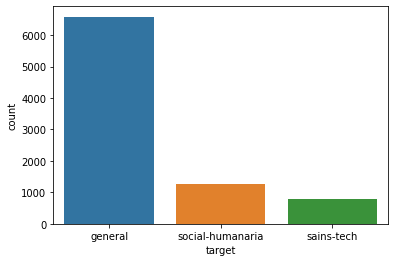

In [12]:
sns.countplot(df.target_class)
plt.xlabel('target')
plt.ylabel('count')

In [13]:
df.sort_values('category')

,title,text_cleaning,category,target_class
292,Black and Blue,black blue,Abused women,general
589,Ethan Frome,ethan frome,Accident victims,general
954,It Would Be So Nice If You Weren't Here,would nice werent,Actors,general
2807,While I Was Gone,gone,Adultery,general
1696,Swallows and Amazons,swallow amazon,Adventure,general
...,...,...,...,...
2923,Lou Gehrig,lou gehrig,no_category,general
1500,Retreat from Doomsday,retreat doomsday,no_category,general
736,Going Clear,going clear,no_category,general
2633,The Years of Lyndon Johnson,year lyndon johnson,no_category,general


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.svm import SVC
import numpy as np

In [15]:
le = LabelEncoder()
labels = le.fit_transform(df['target_class'].values)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
keyValues = {int(labels[i]) :le.inverse_transform(labels)[i] for i in range(len(le.inverse_transform(labels)))}
keyValues

{0: 'general', 2: 'social-humanaria', 1: 'sains-tech'}

In [17]:
with open('result/labeling.json', 'w', encoding='utf-8') as output:
    dump = json.dumps(keyValues)
    output.write(dump)

In [18]:
df.target_class.value_counts()/np.float(len(df))

general             0.762765
social-humanaria    0.145652
sains-tech          0.091583
Name: target_class, dtype: float64

proof about cosine similarity

In [19]:
df[df.target_class == 'general']

,title,text_cleaning,category,target_class
0,"Surely You're Joking, Mr. Feynman!",surely youre joking mr feynman,Biography & Autobiography,general
1,What Do You Care What Other People Think?,care people think,Biography & Autobiography,general
2,10% Happier,happier,Buddhism,general
3,100 Best-Loved Poems,bestloved poem,Poetry,general
4,100 Great Operas And Their Stories,great opera story,Music,general
...,...,...,...,...
8631,Hunting Shadows: An Inspector Ian Rutledge Mys...,hunting shadow inspector ian rutledge mystery ...,"Mystery, Thriller & Suspense",general
8632,Scandalous Behavior (A Stone Barrington Novel),scandalous behavior stone barrington novel,"Mystery, Thriller & Suspense",general
8634,The Ghostly Quilts on Main (Colebridge Communi...,ghostly quilt main colebridge community,"Mystery, Thriller & Suspense",general
8635,Saving Jason (A Jason Stafford Novel),saving jason jason stafford novel,"Mystery, Thriller & Suspense",general


In [20]:
soshum_variable = df[df.target_class == 'social-humanaria']['title']
saintek_variable = df[df.target_class == 'sains-tech']['title']
general_variable = df[df.target_class == 'general']['title']
documents = [*saintek_variable, *soshum_variable, *general_variable]
documents

['A Comprehensive Introduction to Differential Geometry',
 'A Course in Mathematical Analysis',
 'A Cultural History of Physics',
 'A Guide to LATEX',
 'A History of Western Technology',
 "A Mathematician's Apology",
 'A New Earth',
 'A Plea for the Animals',
 'A Programming Language',
 'An Outline of Psycho-Analysis',
 'Analysis, Manifolds and Physics, Part 1',
 'Architects of the Web',
 'Astrophysics for People in a Hurry',
 'Auberge Of The Flowering Hearth',
 'Brain Architecture',
 'Breath, Eyes, Memory',
 'C Programming Language',
 'Cancer Ward',
 'Cancer as a Metabolic Disease',
 'Computation',
 'Concepts of Particle Physics',
 'Conceptual Physics',
 'Data-Driven Marketing',
 'Dirt and Disease',
 'Earth Abides',
 'Earth in Human Hands',
 'Earthseed',
 'Elements of the Theory of Computation',
 'Encyclopedia of Physics',
 'Enriching the Earth',
 'Facts and Fallacies of Software Engineering',
 'Feynman Lectures on Computation',
 'Fierce Invalids Home From Hot Climates',
 'For the Lov

In [21]:
tfidf = TfidfVectorizer(
        min_df=1,  # min count for relevant vocabulary
        max_features=4000,  # maximum number of features
        strip_accents='unicode',  # replace all accented unicode char 
        # by their corresponding  ASCII char
        analyzer='word',  # features made of words
        token_pattern=r'\w{1,}',  # tokenize only words of 4+ chars
        ngram_range=(1, 1),  # features made of a single tokens
        use_idf=True,  # enable inverse-document-frequency reweighting
        smooth_idf=True,  # prevents zero division for unseen words
        sublinear_tf=False
    )
sparse = tfidf.fit_transform(documents)


In [22]:
table = pd.DataFrame(sparse.toarray(), index=documents, columns=tfidf.get_feature_names())
table.head()

,0,000,1,10,100,101,10th,11,11g,11th,...,yourself,youth,z,zelda,zen,zero,zombie,zombies,zone,zozzy
A Comprehensive Introduction to Differential Geometry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Course in Mathematical Analysis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Cultural History of Physics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Guide to LATEX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A History of Western Technology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
similarity_scores = cosine_similarity(table)
similarity_scores

array([[1.        , 0.0424766 , 0.04680884, ..., 0.        , 0.02540165,
        0.03450189],
       [0.0424766 , 1.        , 0.05738264, ..., 0.        , 0.03113972,
        0.04229563],
       [0.04680884, 0.05738264, 1.        , ..., 0.        , 0.0343157 ,
        0.04660942],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.10726394],
       [0.02540165, 0.03113972, 0.0343157 , ..., 0.        , 1.        ,
        0.02529343],
       [0.03450189, 0.04229563, 0.04660942, ..., 0.10726394, 0.02529343,
        1.        ]])

In [24]:
def recommend(book):
    array = []
    book_index = np.where(table.index == book)[0][0]
    distances = similarity_scores[book_index]
    book_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    print('scoring',book_list)
    
    for i in book_list:
        array.append(table.index[i[0]])
    return array
book_recommendation_sys = recommend("An Outline of Psycho-Analysis")
book_recommendation_sys

scoring [(8347, 0.5160440575521676), (361, 0.3947525080371842), (8011, 0.3925130059416988), (196, 0.3875121542785739), (4130, 0.37589409471147817)]


['The outline of sanity,',
 'Performance Analysis: An Introductory Coursebook',
 "Schaum's Outline of French Grammar",
 'An Introduction to Genetic Analysis',
 "The Qur'an"]

In [25]:
array = []
for book in book_recommendation_sys:
    book_target = df[df['title'] == book]
    array.append(book_target.target_class)
array

[8264    general
 Name: target_class, dtype: object,
 4652    sains-tech
 Name: target_class, dtype: object,
 7829    general
 Name: target_class, dtype: object,
 3536    sains-tech
 Name: target_class, dtype: object,
 2395    general
 Name: target_class, dtype: object]

Training - test model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsOneClassifier

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df['text_cleaning'].values.tolist(), labels, test_size=0.25)

cosine_similarity kernels

In [28]:
model = make_pipeline(
        TfidfVectorizer(
        min_df=1,  # min count for relevant vocabulary
        max_features=4000,  # maximum number of features
        strip_accents='unicode',  # replace all accented unicode char 
        # by their corresponding  ASCII char
        analyzer='word',  # features made of words
        token_pattern=r'\w{1,}',  # tokenize only words of 4+ chars
        ngram_range=(1, 1),  # features made of a single tokens
        use_idf=True,  # enable inverse-document-frequency reweighting
        smooth_idf=True,  # prevents zero division for unseen words
        sublinear_tf=False
    ),
    SVC(kernel=cosine_similarity)
)
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=4000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=False,...tern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='

In [29]:
y_pred_test = model.predict(x_test)
print('model accuracy score with cosine similarity: {0} -> {1}'.format(accuracy_score(y_test, y_pred_test), y_pred_test))

model accuracy score with cosine similarity: 0.9481481481481482 -> [0 2 2 ... 0 2 0]


In [30]:
print('test classification report\n', classification_report(y_test, y_pred_test, target_names=['sains-tech', 'social-humanaria', 'general']))

test classification report
                   precision    recall  f1-score   support

      sains-tech       0.94      1.00      0.97      1644
social-humanaria       0.99      0.78      0.87       195
         general       0.96      0.79      0.86       321

        accuracy                           0.95      2160
       macro avg       0.96      0.86      0.90      2160
    weighted avg       0.95      0.95      0.95      2160



Evaluation model with Pipeline

In [35]:
text = ['An Outline of Psycho-Analysis']
text_pred = model.predict(text)
text_pred

array([1])

In [32]:
import pickle5 as pickle

In [33]:
pickle.dump(model, open('result/model.pkl', 'wb'))

In [34]:
load_model = pickle.load(open('result/model.pkl', 'rb'))
load_model.predict(text)

array([2])